In [1]:
!pip install arabic-reshaper
!pip install python-bidi

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display

In [3]:
# Set up visualization style
sns.set(style="whitegrid")

In [4]:
# Load the dataset
df = pd.read_excel(r"C:\Users\Admin\Desktop\Hakathon Deadline 20-1\Final.xlsx")

In [5]:
# # Reshape the Arabic text and reverse its direction for proper display:

# import arabic_reshaper
# from bidi.algorithm import get_display

# # Function to reshape Arabic text
# def reshape_arabic(text):
#     reshaped_text = arabic_reshaper.reshape(text)
#     bidi_text = get_display(reshaped_text)
#     return bidi_text

# # Apply the reshaping to all Arabic columns
# arabic_columns = ['city', 'district', 'front']  # Replace with your Arabic column names
# for col in arabic_columns:
#     df[col] = df[col].apply(reshape_arabic)

# # Display the DataFrame in proper format
# from IPython.display import display
# display(df.head())

In [6]:
# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
df.head(2)

First 5 rows of the dataset:


,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,frontyard,basement,duplex,stairs,elevator,fireplace,price,YearlyRentPrice,Status,details
0,الرياض,حي الروضة,غرب,3000,19,3,5,5,1,1,...,1,1,0,0,0,0,250000,250000,Keep,كمباوند يتالف من ٥ فلل منفصلة ٤ فلل ٣ غرف نوم ...
1,الرياض,حي السليمانية,شمال,2944,0,5,4,3,1,0,...,1,0,0,0,0,0,700000,130000,Edit (Data entry mistake),مجمع فلل كمبوند صغير به ٦ فلل سكنية كل فيلا تت...


In [7]:
# Display basic information about the dataset
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1497 entries, 0 to 1496
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   city             1497 non-null   object
 1   district         1497 non-null   object
 2   front            1497 non-null   object
 3   size             1497 non-null   int64 
 4   property_age     1497 non-null   int64 
 5   bedrooms         1497 non-null   int64 
 6   bathrooms        1497 non-null   int64 
 7   livingrooms      1497 non-null   int64 
 8   kitchen          1497 non-null   int64 
 9   garage           1497 non-null   int64 
 10  driver_room      1497 non-null   int64 
 11  maid_room        1497 non-null   int64 
 12  furnished        1497 non-null   int64 
 13  ac               1497 non-null   int64 
 14  roof             1497 non-null   int64 
 15  pool             1497 non-null   int64 
 16  frontyard        1497 non-null   int64 
 17  basement   

In [8]:
# Check for missing values
print(df.isnull().sum())

city                0
district            0
front               0
size                0
property_age        0
bedrooms            0
bathrooms           0
livingrooms         0
kitchen             0
garage              0
driver_room         0
maid_room           0
furnished           0
ac                  0
roof                0
pool                0
frontyard           0
basement            0
duplex              0
stairs              0
elevator            0
fireplace           0
price               0
YearlyRentPrice     0
Status              0
details            50
dtype: int64


In [9]:
# Fill missing values in 'details' with 'Unknown'
df['details'].fillna('Unknown', inplace=True)

In [10]:
# Standardize Text Data
# Convert text data to lowercase and remove extra spaces.
df['city'] = df['city'].str.lower().str.strip()
df['district'] = df['district'].str.lower().str.strip()
df['front'] = df['front'].str.strip()

In [11]:
# List of columns to check
columns_to_check = [
    'city', 'district', 'front', 'bedrooms', 
    'bathrooms', 'livingrooms', 'kitchen', 'garage', 'driver_room', 
    'maid_room', 'furnished', 'ac', 'roof', 'pool', 'frontyard', 
    'basement', 'duplex', 'stairs', 'elevator', 'fireplace',
]

# Check unique values and value counts for each column
for col in columns_to_check:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("-" * 50)

Column: city
الرياض    893
جدة       400
الدمام    121
الخبر      83
Name: city, dtype: int64
--------------------------------------------------
Column: district
حي الرمال            117
حي العارض             82
حي المحمدية           46
حي الشاطئ             40
حي الملقا             39
                    ... 
حي بريمان              1
حي السفن               1
حي مشرفة               1
حي ام سليم             1
حي الخبر الشمالية      1
Name: district, Length: 173, dtype: int64
--------------------------------------------------
Column: front
شمال         379
شرق          322
غرب          296
جنوب         281
شمال شرقي     68
جنوب شرقي     45
شمال غربي     38
جنوب غربي     36
3 شوارع       23
4 شوارع        9
Name: front, dtype: int64
--------------------------------------------------
Column: bedrooms
5    633
4    345
7    250
3    144
6    103
2     12
1     10
Name: bedrooms, dtype: int64
--------------------------------------------------
Column: bathrooms
5    1057
4     299
3     115
2

Handling Price outliers

In [12]:
df['YearlyRentPrice'].unique()

array([ 250000,  130000,  450000, 1700000,   65000,  800000,   80000,
        300000,  290000,  350000,   70000,  150000,  160000,  200000,
        400000,  170000,  140000,   50000,  100000,  165000,   95000,
        220000,  110000,  120000,  180000,  145000,  650000,  420000,
         45000,   85000,   90000,  115000,  190000,  320000,  175000,
         55000,  600000,  370000,   35000,   60000,   32000,   38000,
         40000,   45005,   75000,  125000,  195000,  270000,  105000,
         30000,  135000,   25000,   46000,  700000,  179000,   33000,
         37500,   52000,  199000,  330000,   47000,  185000,   76000,
         36000,   48000,   56000,   83000,   58000,   67000,  550000,
         43000,   37000,   79000,   53000,   49950,   24000,   19000,
         31000,   38400,   39000,   39996,   42000,   59000,   72000,
        540000, 1300000,   39600,   27000,   66500,   50400,   34000,
        155000,  212000,  780000,  143000,   20000,  365000,   28000,
         15000,   62

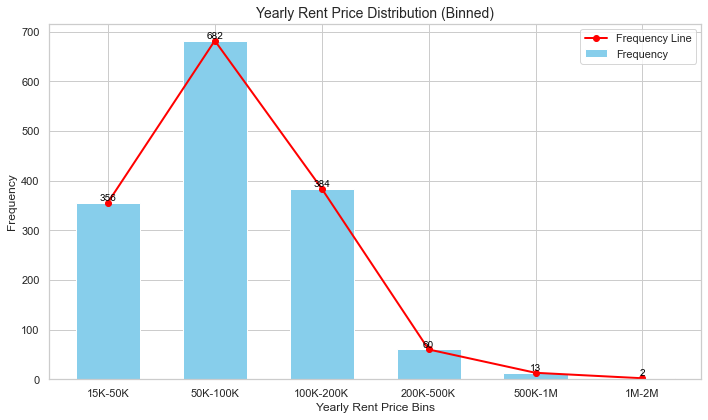

15K-50K      356
50K-100K     682
100K-200K    384
200K-500K     60
500K-1M       13
1M-2M          2
Name: BinnedRentPrice, dtype: int64


In [13]:
# YearlyRentPrice Distribution

# Bin the YearlyRentPrice into intervals
bins = [15000, 50000, 100000, 200000, 500000, 1000000, 2000000]
labels = ['15K-50K', '50K-100K', '100K-200K', '200K-500K', '500K-1M', '1M-2M']
df['BinnedRentPrice'] = pd.cut(df['YearlyRentPrice'], bins=bins, labels=labels, include_lowest=True)

# Get value counts (frequency of each bin)
bin_counts = df['BinnedRentPrice'].value_counts().sort_index()

# Plot the bar plot for binned data
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bar chart
bin_counts.plot(kind='bar', ax=ax, color='skyblue', width=0.6, label='Frequency')

# Overlay a line plot for the same data
bin_counts.plot(kind='line', ax=ax, color='red', marker='o', linewidth=2, label='Frequency Line')

# Add text annotations above the bars
for i, count in enumerate(bin_counts):
    ax.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=10, color='black')
    
# Customize the plot
ax.set_title('Yearly Rent Price Distribution (Binned)', fontsize=14)
ax.set_xlabel('Yearly Rent Price Bins', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

print(bin_counts)

**Skewed Distribution:**The distribution of rent prices is positively skewed, with a higher frequency of rent prices concentrated in the lower bins (under 100,000). As rent prices increase beyond this point, the frequency sharply decreases.

**Dominance of Lower Rent Prices:**The majority of the data points fall within the **15K-50K** (356 occurrences) and **50K-100K** (682 occurrences) bins, suggesting that most renters in the market are paying within this range.

**High Frequency at Specific Rent Values:**The data indicates significant spikes at round rent values like **40,000** and **50,000**, which may represent common rent thresholds or popular market price points.

**Outliers:**A small number of data points are present in higher rent price ranges, particularly in the **500K-1M** (13 occurrences) and **1M-2M** (2 occurrences) bins. These likely represent rare occurrences or luxury properties catering to a niche market.

**Mode:**The most common rent prices fall within the **50K-100K** range, making this the modal category. This highlights the affordability preferences or financial capabilities of the majority of renters in the market.

In [14]:
# Filter rows where YearlyRentPrice is greater than 800000
filtered_rows = df[df['YearlyRentPrice'] > 800000]

# Display the filtered rows
display(filtered_rows)

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,basement,duplex,stairs,elevator,fireplace,price,YearlyRentPrice,Status,details,BinnedRentPrice
3,جدة,حي الروضة,شمال,2500,0,5,5,5,1,1,...,1,0,1,1,0,1700000,1700000,Keep,العقار فيه مميزات كثير له وله تراخيص جاهزه مجه...,1M-2M
1139,جدة,حي الحمدانية,3 شوارع,300,0,5,5,3,1,1,...,1,0,1,1,1,1300000,1300000,Keep,فيلا فاخرة حي الحمدانيه\nمكونات المشروع دورين ...,1M-2M


In [15]:
# Calculate the Mean (excluding the outliers)

# Calculate the mean for حي الحمدانية excluding the outlier value 1700000
mean_hamadaniyah = df[(df['district'] == 'حي الحمدانية') & (df['YearlyRentPrice'] != 1700000)]['YearlyRentPrice'].mean()

# Round the mean value for حي الحمدانية
mean_hamadaniyah_rounded = round(mean_hamadaniyah)

# Print the rounded mean for verification
print(f"Rounded Mean for حي الحمدانية: {mean_hamadaniyah_rounded}")

# Calculate the mean for حي الروضة excluding the outlier value 1300000
mean_rawdah = df[(df['district'] == 'حي الروضة') & (df['YearlyRentPrice'] != 1300000)]['YearlyRentPrice'].mean()

# Round the mean value for حي الروضة
mean_rawdah_rounded = round(mean_rawdah)

# Print the rounded mean for verification
print(f"Rounded Mean for حي الروضة: {mean_rawdah_rounded}")

Rounded Mean for حي الحمدانية: 181818
Rounded Mean for حي الروضة: 201781


In [16]:
#  Replace the Outliers with the Calculated Means
# Make a copy of the updated dataframe for analysis
df_cleaned = df.copy()

# Replace the outlier value (1700000) in حي الحمدانية with the rounded mean
df_cleaned.loc[df_cleaned['YearlyRentPrice'] == 1700000, 'YearlyRentPrice'] = mean_hamadaniyah_rounded

# Replace the outlier value (1300000) in حي الروضة with the rounded mean
df_cleaned.loc[df_cleaned['YearlyRentPrice'] == 1300000, 'YearlyRentPrice'] = mean_rawdah_rounded

# Verify by printing the updated rows
print("\nUpdated YearlyRentPrice for حي الحمدانية:")
print(df_cleaned.loc[df_cleaned['district'] == 'حي الحمدانية', ['district', 'YearlyRentPrice']])

print("\nUpdated YearlyRentPrice for حي الروضة:")
print(df_cleaned.loc[df_cleaned['district'] == 'حي الروضة', ['district', 'YearlyRentPrice']])

# Check the number of rows in the dataframe
print(f"\nOriginal number of rows: {len(df)}")
print(f"Number of rows in df_cleaned: {len(df_cleaned)}")
print(df_cleaned.info())


Updated YearlyRentPrice for حي الحمدانية:
          district  YearlyRentPrice
109   حي الحمدانية           120000
290   حي الحمدانية            45000
355   حي الحمدانية            80000
364   حي الحمدانية            50000
492   حي الحمدانية            50000
622   حي الحمدانية            50000
781   حي الحمدانية            55000
835   حي الحمدانية            45000
976   حي الحمدانية            55000
1125  حي الحمدانية           150000
1139  حي الحمدانية           201781

Updated YearlyRentPrice for حي الروضة:
       district  YearlyRentPrice
0     حي الروضة           250000
3     حي الروضة           181818
7     حي الروضة           300000
40    حي الروضة           110000
42    حي الروضة           120000
43    حي الروضة           150000
53    حي الروضة           120000
106   حي الروضة           150000
108   حي الروضة           200000
112   حي الروضة           600000
143   حي الروضة           120000
235   حي الروضة            80000
237   حي الروضة           250000
238   حي الروضة        

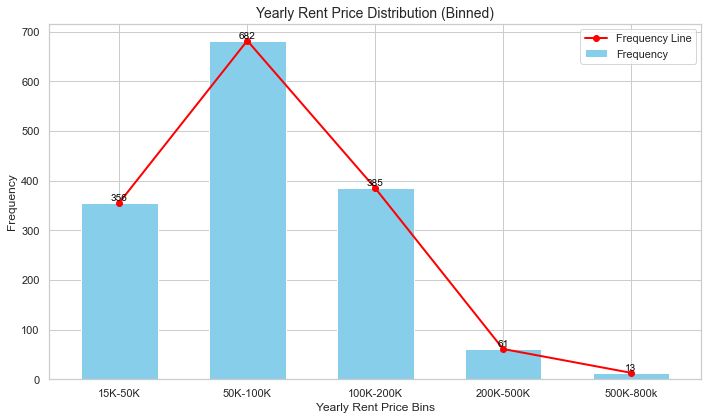

15K-50K      356
50K-100K     682
100K-200K    385
200K-500K     61
500K-800k     13
Name: BinnedRentPrice, dtype: int64


In [17]:
# Price Distribution

# Bin the YearlyRentPrice into intervals
bins = [15000, 50000, 100000, 200000, 500000, 800000]
labels = ['15K-50K', '50K-100K', '100K-200K', '200K-500K', '500K-800k']
df_cleaned['BinnedRentPrice'] = pd.cut(df_cleaned['YearlyRentPrice'], bins=bins, labels=labels, include_lowest=True)

# Get value counts (frequency of each bin)
bin_counts = df_cleaned['BinnedRentPrice'].value_counts().sort_index()

# Plot the bar plot for binned data
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bar chart
bin_counts.plot(kind='bar', ax=ax, color='skyblue', width=0.6, label='Frequency')

# Overlay a line plot for the same data
bin_counts.plot(kind='line', ax=ax, color='red', marker='o', linewidth=2, label='Frequency Line')

# Add text annotations above the bars
for i, count in enumerate(bin_counts):
    ax.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=10, color='black')
    
# Customize the plot
ax.set_title('Yearly Rent Price Distribution (Binned)', fontsize=14)
ax.set_xlabel('Yearly Rent Price Bins', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

print(bin_counts)

The values 1700000 in حي الروضة and 1300000 in حي الحمدانية were replaced with the mean rental price in each district after excluded these two values because the written rental price was not logical for the specifications and details of the property.

In [18]:
# # Convert 'YearlyRentPrice' to numeric
df_cleaned['YearlyRentPrice'] = df_cleaned['YearlyRentPrice'].astype(int)

# Now the 'YearlyRentPrice' should be an integer type
print(df_cleaned['YearlyRentPrice'].dtype)  # Verify the data type

int32


## EDA

### Step 1: Univariate Analysis

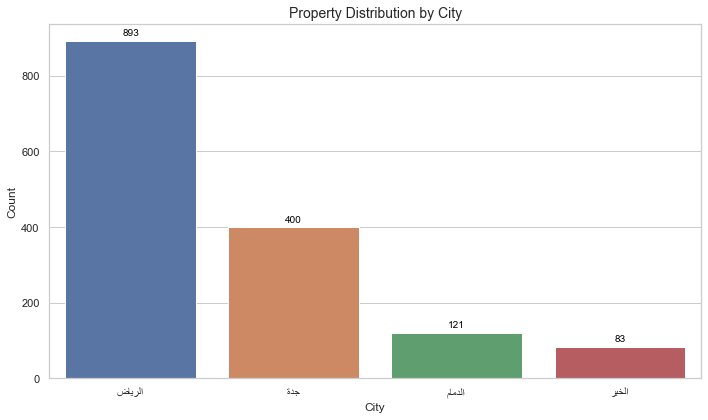

In [19]:
# City Distribution

# Reshape and display Arabic text properly
df_cleaned['city'] = df_cleaned['city'].apply(lambda x: get_display(arabic_reshaper.reshape(x)))

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_cleaned, x='city', order=df_cleaned['city'].value_counts().index)
plt.title('Property Distribution by City', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)

# Add numbers above bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')
    
# Show the plot
plt.tight_layout()
plt.show()

The property distribution by city shows that Riyadh has the highest number of properties, with 893 listings. This is followed by Jeddah with 400 properties, Dammam with 121 properties, and Khobar with 83 properties. This indicates a significant concentration of properties in Riyadh, while the other cities have relatively fewer listings.

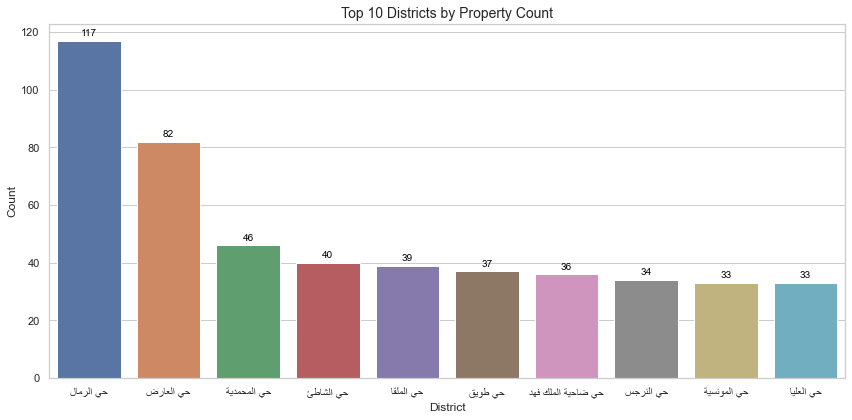

In [20]:
# District Distribution (Top 10 districts)

# Reshape and display Arabic text properly
df['district'] = df['district'].apply(lambda x: get_display(arabic_reshaper.reshape(x)))

# Prepare data for top 10 districts
plt.figure(figsize=(12, 6))
top_districts = df['district'].value_counts().nlargest(10)
ax = sns.barplot(x=top_districts.index, y=top_districts.values)

# Titles and labels
plt.title('Top 10 Districts by Property Count', fontsize=14)
plt.xlabel('District', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)

# Add numbers above bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')
    
# Show the plot
plt.tight_layout()
plt.show()

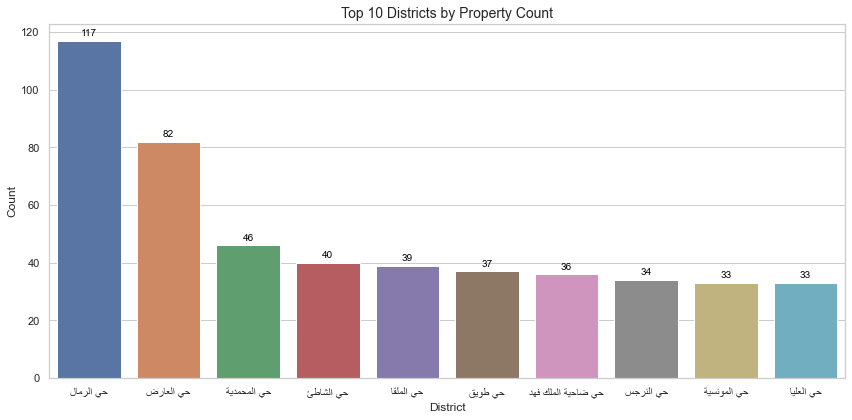

In [21]:
# # Reshape Arabic text properly for district column
# df['district'] = df['district'].apply(lambda x: get_display(arabic_reshaper.reshape(x)))

# Prepare data for top 10 districts and least 10 districts
top_districts = df['district'].value_counts().nlargest(10)

# Plotting the top 10 districts
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_districts.index, y=top_districts.values)
plt.title('Top 10 Districts by Property Count', fontsize=14)
plt.xlabel('District', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)

# Add numbers above bars for top districts
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')
    
plt.tight_layout()
plt.show()

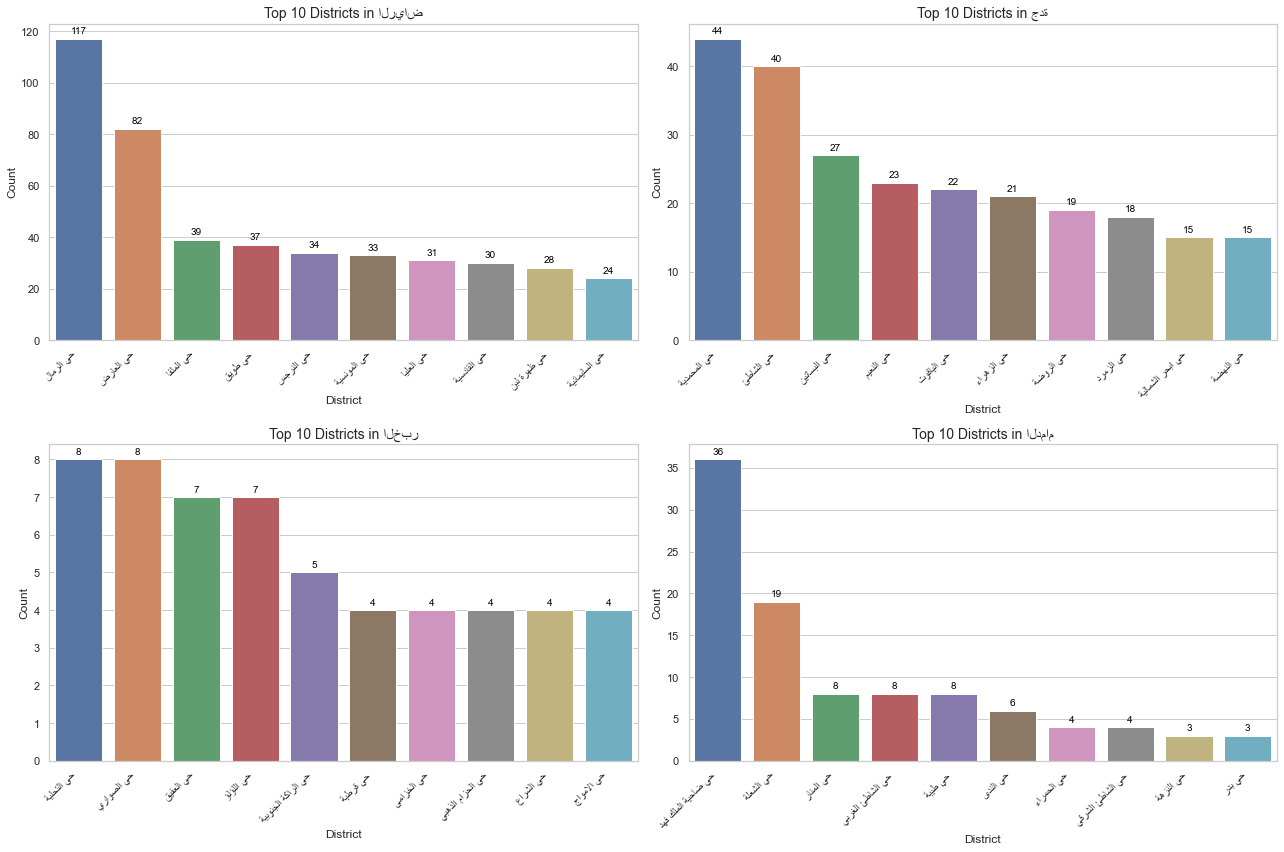

In [22]:
# Top 10 Districts by City

# # Reshape and display Arabic text properly for 'city' and 'district' columns
# df['city'] = df['city'].apply(lambda x: get_display(arabic_reshaper.reshape(x)))
# df['district'] = df['district'].apply(lambda x: get_display(arabic_reshaper.reshape(x)))

# Define the figure and axes for 4 graphs (2x2 layout)
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()

# Loop through each city and plot the top 10 districts
cities = df['city'].unique()
for i, city in enumerate(cities[:4]):  # Limit to 4 cities
    # Filter data for the current city and get top 10 districts
    city_data = df[df['city'] == city]
    top_districts = city_data['district'].value_counts().nlargest(10)
    
    # Plot the graph for the current city
    ax = axes[i]
    sns.barplot(x=top_districts.index, y=top_districts.values, ax=ax)
    
    # Titles and labels
    ax.set_title(f'Top 10 Districts in {city}', fontsize=14)
    ax.set_xlabel('District', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.set_xticklabels(top_districts.index, rotation=45, ha='right')

    # Add numbers above the bars
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Adjust layout for better appearance
plt.tight_layout()
plt.show()


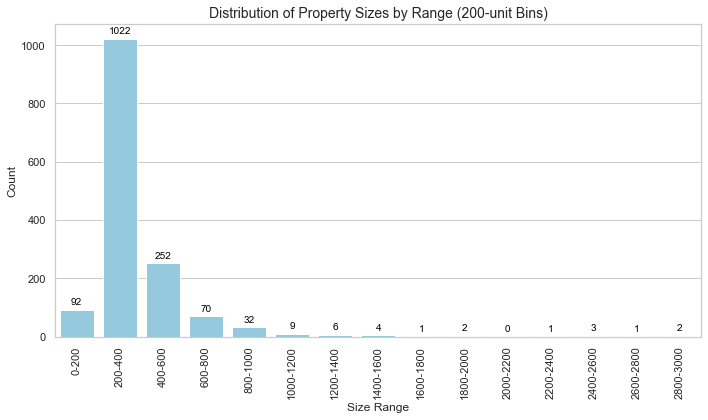

In [23]:
# Property Size Distribution

# Use value_counts() to get frequencies and define bins every 200
bins = list(range(0, 3200, 200))  # Bins from 0 to 3200 with step of 200
labels = [f'{i}-{i+200}' for i in bins[:-1]]  # Labels for the bins (e.g., '0-200', '200-400', ...)

# Bin the data
df_cleaned['size_range'] = pd.cut(df_cleaned['size'], bins=bins, labels=labels, include_lowest=True)
binned_counts = df_cleaned['size_range'].value_counts().sort_index()

# Bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=binned_counts.index, y=binned_counts.values, color='skyblue')

# Add annotations
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')
    
# Titles and labels
plt.title('Distribution of Property Sizes by Range (200-unit Bins)', fontsize=14)
plt.xlabel('Size Range', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

The distribution of property sizes reveals the following trends:

1.  **Smaller Properties Dominate**:
    
    *   The most common size range is **200-400 sq. mtr**, with **1,022 properties**, making it the largest category.
        
    *   The second most common range is **400-600 sq. mtr**, with **252 properties**.
        
    *   Smaller properties under **200 sq. mtr** are also notable, with **92 properties** in this range.
        
2.  **Mid-Sized Properties**:
    
    *   The **600-800 sq. mtr** range has **70 properties**, showing a significant decrease compared to smaller properties.
        
    *   The **800-1000 sq. mtr** range contains **32 properties**, further emphasizing the declining trend as size increases.
        
3.  **Larger Properties Are Rare**:
    
    *   Properties between **1000-1200 sq. mtr** account for **9 properties**, while the **1200-1400 sq. mtr** range has only **6 properties**.
        
    *   Sizes between **1400-1600 sq. mtr** drop to just **4 properties**.
        
4.  **Sparse Properties in Larger Ranges**:
    
    *   Isolated cases appear for very large properties:
        
        *   **1600-1800 sq. mtr**: 1 property
            
        *   **1800-2000 sq. mtr**: 2 properties
            
        *   **2200-2400 sq. mtr**: 1 property
            
        *   **2400-2600 sq. mtr**: 3 properties
            
        *   **2600-2800 sq. mtr**: 1 property
            
        *   **2800-3000 sq. mtr**: 2 properties
            
    *   No properties were found in the **2000-2200 sq. mtr** range.
        

### Key Insights:

*   **Compact Housing Focus**: Properties under **600 sq. mtr** dominate the dataset, indicating a preference for compact housing or spaces in the observed regions.
    
*   **Larger Spaces are Rare**: As property size increases, the frequency decreases dramatically, with very few properties exceeding **1000 sq. mtr**. This could reflect limited demand or availability for larger properties in the dataset.

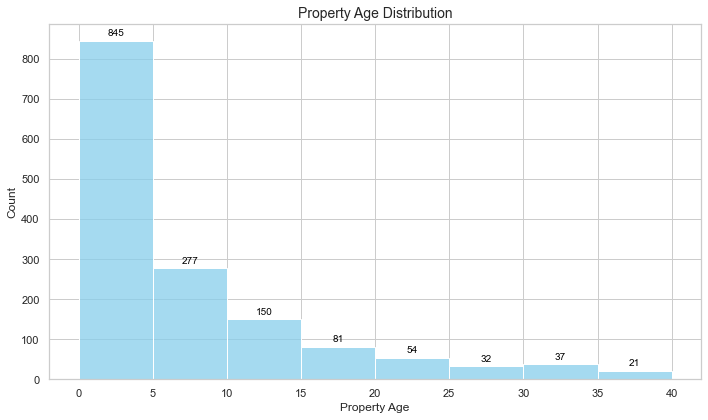

In [24]:
# Property Age Distribution
plt.figure(figsize=(10, 6))

# Define bins to cover the entire range, including 36
bins = range(0, 41, 5)  # Bins from 0 to 40 with step of 5

ax = sns.histplot(df_cleaned['property_age'], bins=bins, kde=False, color='skyblue')

# Add annotations above the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Titles and labels
plt.title('Property Age Distribution', fontsize=14)
plt.xlabel('Property Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(bins)  # Ensure all bin edges are labeled on the x-axis

# Display plot
plt.tight_layout()
plt.show()

In [25]:
# Define bins and corresponding labels
bins = [0, 5, 10, 15, 20, 25, 30, 35, np.inf]  # Include infinity to cover values >= 35
labels = ['0-5 years', '6-10 years', '11-15 years', '16-20 years', '21-25 years', 
          '26-30 years', '31-35 years', '36+ years']  # Correct number of labels

# Bin the property age and calculate the counts
df_cleaned['PropertyAgeRange'] = pd.cut(df_cleaned['property_age'], bins=bins, labels=labels, right=False, include_lowest=True)
age_distribution = df_cleaned['PropertyAgeRange'].value_counts().sort_index()

# Display the quantitative results
print("Property Age Distribution:")
print(age_distribution)

Property Age Distribution:
0-5 years      845
6-10 years     277
11-15 years    150
16-20 years     81
21-25 years     54
26-30 years     32
31-35 years     37
36+ years       21
Name: PropertyAgeRange, dtype: int64


The property age distribution reveals that the majority of properties fall within the **0–5 years** range, with **845 properties** (the largest group in the dataset), highlighting the dominance of relatively new developments.

Properties aged **6–10 years** account for **277 properties**, representing a significant portion of slightly older properties.

As the age range increases, the count continues to decline:

*   **11–15 years**: 150 properties
    
*   **16–20 years**: 81 properties
    
*   **21–25 years**: 54 properties
    
*   **26–30 years**: 32 properties
    

Interestingly, there is a slight uptick in properties aged **31–35 years**, totaling **37 properties**. This may suggest a niche market or areas with older, well-established developments.

For properties aged **36+ years**, the count drops to **21 properties**, confirming that older properties form a small fraction of the dataset.

### Key Insights:

*   **Newer Properties Dominate**: Properties under **10 years old** make up the majority of the dataset, indicating a focus on recent development projects or high demand for newer homes.
    
*   **Consistent Decline**: The number of properties decreases steadily as age increases, with very few properties exceeding **30 years**.
    
*   **Potential Market for Older Properties**: The slight increase in the **31–35 years** range suggests a potential market for well-maintained or historically significant older properties.

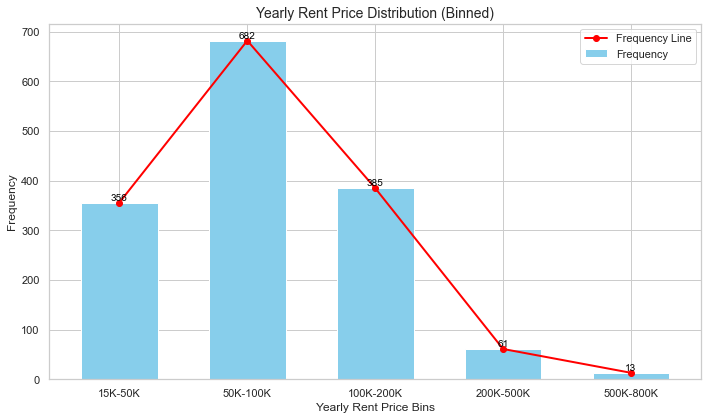

In [26]:
# Price Distribution

# Bin the YearlyRentPrice into intervals
bins = [15000, 50000, 100000, 200000, 500000, 800000]
labels = ['15K-50K', '50K-100K', '100K-200K', '200K-500K', '500K-800K']
df_cleaned['BinnedRentPrice'] = pd.cut(df_cleaned['YearlyRentPrice'], bins=bins, labels=labels, include_lowest=True)

# Get value counts (frequency of each bin)
bin_counts = df_cleaned['BinnedRentPrice'].value_counts().sort_index()

# Plot the bar plot for binned data
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bar chart
bin_counts.plot(kind='bar', ax=ax, color='skyblue', width=0.6, label='Frequency')

# Overlay a line plot for the same data
bin_counts.plot(kind='line', ax=ax, color='red', marker='o', linewidth=2, label='Frequency Line')

# Add text annotations above the bars
for i, count in enumerate(bin_counts):
    ax.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=10, color='black')
    
# Customize the plot
ax.set_title('Yearly Rent Price Distribution (Binned)', fontsize=14)
ax.set_xlabel('Yearly Rent Price Bins', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [27]:
# Bin the YearlyRentPrice into intervals
bins = [15000, 50000, 100000, 200000, 500000, 800000]
labels = ['15K-50K', '50K-100K', '100K-200K', '200K-500K', '500K-800K']
df_cleaned['BinnedRentPrice'] = pd.cut(df_cleaned['YearlyRentPrice'], bins=bins, labels=labels, include_lowest=True)

# Get value counts (frequency of each bin)
bin_counts = df_cleaned['BinnedRentPrice'].value_counts().sort_index()

# Display the results as a table
print("Yearly Rent Price Distribution:")
for bin_label, count in bin_counts.items():
    print(f"{bin_label}: {count}")


Yearly Rent Price Distribution:
15K-50K: 356
50K-100K: 682
100K-200K: 385
200K-500K: 61
500K-800K: 13


The findings from the yearly rent price distribution for properties in **الرياض**, **جدة**, **الدمام**, and **الخبر** reveal the following trends:

1.  **15K-50K:** This range includes **356 listings**, highlighting a significant portion of affordable or budget-friendly rental properties across these cities.
    
2.  **50K-100K:** With **682 listings**, this is the largest category in the distribution, indicating that mid-range rental properties dominate the market in these cities.
    
3.  **100K-200K:** This range accounts for **385 listings**, representing a notable share of the market for upper-middle-class rental properties.
    
4.  **200K-500K:** Only **61 properties** are available within this price range, reflecting a smaller share of the market, likely catering to higher-end properties or specific premium areas.
    
5.  **500K-800K:** The smallest category, with just **13 listings**, represents a niche market segment for luxury or exclusive properties.
    

### Key Insights:

*   **Mid-Range Rentals Dominate:** Properties in the **50K-100K** price range form the bulk of the market, making this the most common rental price category.
    
*   **Affordable Options:** The **15K-50K** range also has a significant number of properties, offering more budget-friendly options for renters.
    
*   **Scarcity of High-End Rentals:** Properties priced above **200K** are relatively scarce, particularly in the **500K-800K** range, indicating a limited demand or supply of ultra-luxury rental properties in these cities.

### Step 2: Bivariate Analysis

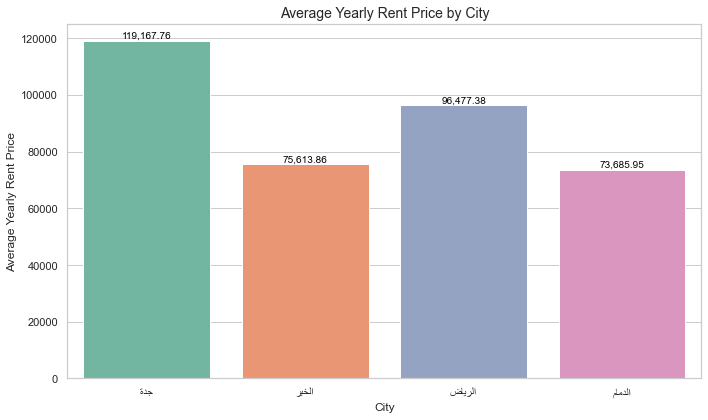

In [44]:
# Price Vs City

# Reshape and display Arabic text properly for 'city' and 'district' columns
df_cleaned['city'] = df_cleaned['city'].apply(lambda x: get_display(arabic_reshaper.reshape(x)))

# Calculate the average yearly rent price for each city
average_prices_by_city = df_cleaned.groupby('city')['YearlyRentPrice'].mean().reset_index()

# Plot: Average Yearly Rent Price by City
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=average_prices_by_city, x='city', y='YearlyRentPrice', palette="Set2", ci=None)

# Add average price annotations above bars
for p in ax.patches:
    height = p.get_height()
    label = f"{height:,.2f}"  # Format with commas and 2 decimal places
    ax.text(p.get_x() + p.get_width() / 2., height, label, 
            ha='center', va='bottom', fontsize=10, color='black')

# Add labels and title
plt.title('Average Yearly Rent Price by City', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Average Yearly Rent Price', fontsize=12)


# Show the plot
plt.tight_layout()
plt.show()


The average yearly rent prices for different cities are as follows:

1.  **ﺟﺪﺓ (Jeddah):** The average yearly rent price is approximately **119,168 SAR**, making it the highest among the four cities.
    
2.  **ﺍﻟﺮﻳﺎﺽ (Riyadh):** The average yearly rent price is **96,477 SAR**, placing it in second position.
    
3.  **ﺍﻟﺨﺒﺮ (Khobar):** The average yearly rent price is **75,614 SAR**, slightly higher than Dammam but significantly lower than Riyadh and Jeddah.
    
4.  **ﺍﻟﺪﻣﺎﻡ (Dammam):** The average yearly rent price is **73,686 SAR**, making it the most affordable city for renting properties.
    

### Key Insights:

*   **Jeddah** leads with the highest rent prices, reflecting its position as a premium market or potentially higher demand.
    
*   **Riyadh** follows closely, indicating a strong mid-to-upper market for rentals.
    
*   **Khobar** and **Dammam** are relatively more affordable, catering to budget-conscious renters or areas with lower demand.

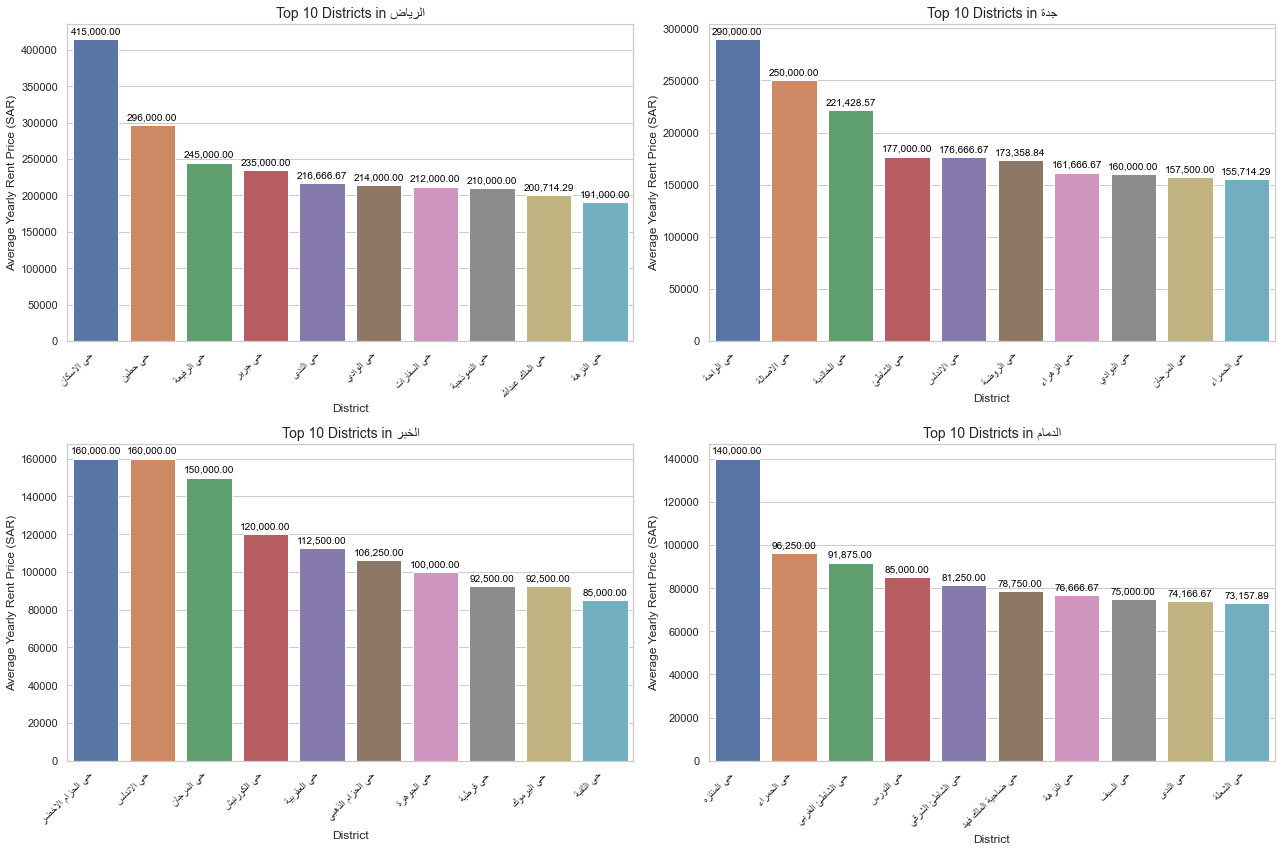

In [29]:
# Reshape and display Arabic text properly for 'city' and 'district' columns
df_cleaned['city'] = df_cleaned['city'].apply(lambda x: get_display(arabic_reshaper.reshape(x)))
df_cleaned['district'] = df_cleaned['district'].apply(lambda x: get_display(arabic_reshaper.reshape(x)))

# Define the figure and axes for 4 graphs (2x2 layout)
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()

# Get unique cities and limit to 4
cities = df_cleaned['city'].unique()
num_cities = min(len(cities), 4)

# Loop through each city and plot the top 10 districts by average price
for i, city in enumerate(cities[:num_cities]):
    # Filter data for the current city and get the average price for each district
    city_data = df_cleaned[df_cleaned['city'] == city]
    top_districts = city_data.groupby('district')['YearlyRentPrice'].mean().nlargest(10).reset_index()
    
    # Plot the graph for the current city
    ax = axes[i]
    sns.barplot(x=top_districts['district'], y=top_districts['YearlyRentPrice'], ax=ax)
    
    # Titles and labels
    ax.set_title(f'Top 10 Districts in {city}', fontsize=14)
    ax.set_xlabel('District', fontsize=12)
    ax.set_ylabel('Average Yearly Rent Price (SAR)', fontsize=12)
    ax.set_xticklabels(top_districts['district'], rotation=45, ha='right')

    # Add average price numbers above the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height():,.2f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Adjust layout for better appearance
plt.tight_layout()
plt.show()

*   **الرياض (Riyadh):**
    
    *   **حي الاسكان** has the highest average yearly rent price at **415,000 SAR**, significantly outpacing other districts in the city.
        
    *   The second and third highest are **حي حطين (296,000 SAR)** and **حي الرفيعة (245,000 SAR)**, reflecting a sharp decline after the top district.
        
*   **جدة (Jeddah):**
    
    *   **حي الواحة** leads with an average rent price of **290,000 SAR**.
        
    *   Other notable districts include **حي الأصالة (250,000 SAR)** and **حي الخالدية (221,429 SAR)**, which follow closely.
        
*   **الخبر (Khobar):**
    
    *   **حي الاندلس** and **حي الحزام الأخضر** share the highest average rent price at **160,000 SAR**.
        
    *   **حي المرجان** follows closely with an average rent price of **150,000 SAR**, maintaining a consistent trend at the top.
        
*   **الدمام (Dammam):**
    
    *   **حي المنتزه** has the highest average yearly rent at **140,000 SAR**.
        
    *   **حي الحمراء** comes next with **96,250 SAR**, followed by **حي الشاطئ الغربي** at **91,875 SAR**.

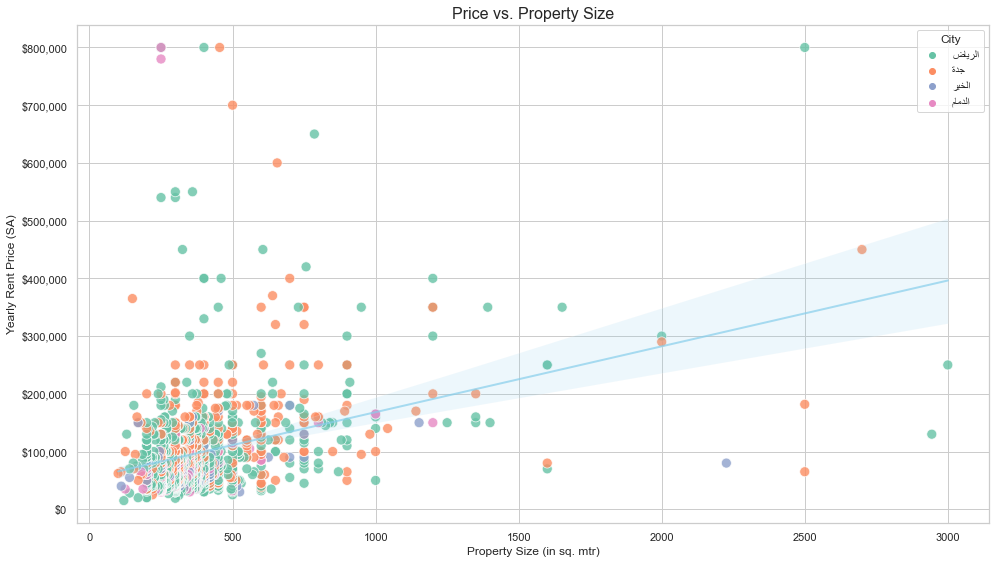

Correlation matrix between Property Size and Yearly Rent Price:
                     size  YearlyRentPrice
size             1.000000         0.343658
YearlyRentPrice  0.343658         1.000000


In [30]:
# Price Vs. Property Size

import matplotlib.ticker as mtick  # Import mtick for formatting axes

# Create the scatter plot
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df_cleaned, x='size', y='YearlyRentPrice', hue='city', palette='Set2', s=100, alpha=0.8)

# Add a trend line (fitting a linear regression model)
sns.regplot(data=df_cleaned, x='size', y='YearlyRentPrice', scatter=False, color='skyblue', line_kws={"linewidth": 2, "alpha": 0.7})

# Customize the y-axis to display currency format
ax = plt.gca()  # Get current axes
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))  # Format y-axis as currency

# Add labels and title
plt.title('Price vs. Property Size', fontsize=16)
plt.xlabel('Property Size (in sq. mtr)', fontsize=12)
plt.ylabel('Yearly Rent Price (SA)', fontsize=12)

# Show the plot
plt.tight_layout()
plt.legend(title="City")
plt.show()

# Perform a correlation analysis to quantify the relationship
correlation = df_cleaned[['size', 'YearlyRentPrice']].corr()
print("Correlation matrix between Property Size and Yearly Rent Price:")
print(correlation)

The scatter plot shows a moderate positive relationship between property size and yearly rent price, with larger properties generally having higher rents.
The correlation coefficient is 0.344, indicating size influences rent but other factors also play a role.
Variations within size ranges suggest city-specific or market dynamics impact pricing.

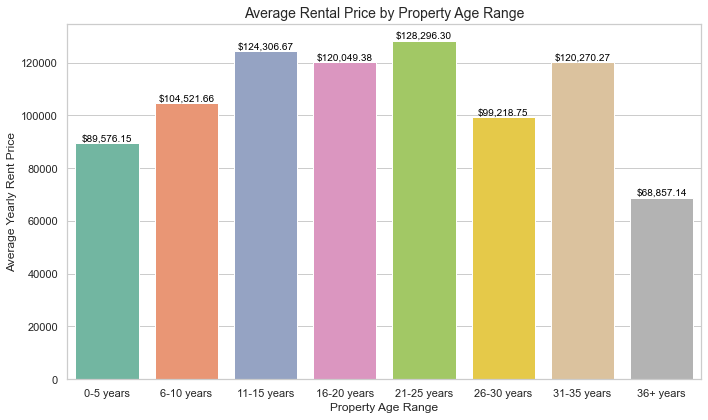

In [31]:
# Calculate average prices for each Range using PropertyAgeRange column
average_prices = df_cleaned.groupby('PropertyAgeRange')['YearlyRentPrice'].mean().reset_index()

# Plot: Average Rental Price by Binned Property Age
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_cleaned, x='PropertyAgeRange', y='YearlyRentPrice', palette="Set2", ci=None)

# Add average price annotations above bars
for index, row in average_prices.iterrows():
    avg_price_formatted = f"${row['YearlyRentPrice']:,.2f}"  # Format with commas and 2 decimal places
    ax.text(index, row['YearlyRentPrice'], avg_price_formatted, 
            color='black', ha='center', va='bottom', fontsize=10)

# Add labels and title
plt.title('Average Rental Price by Property Age Range', fontsize=14)
plt.xlabel('Property Age Range', fontsize=12)
plt.ylabel('Average Yearly Rent Price', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

The average yearly rent prices for properties in different age ranges are as follows:

*   **0-5 years**: The average yearly rent price for newly built properties is 89,576.15 SAR, representing the lowest range among all categories.
    
*   **6-10 years**: Properties in this age range have an average yearly rent price of 104,521.66 SAR, indicating a slight increase from newer properties.
    
*   **11-15 years**: This category has the highest average yearly rent price at 124,306.67 SAR, making it the peak age range for rental prices.
    
*   **16-20 years**: The average yearly rent price for properties aged 16-20 years is 120,049.38 SAR, showing a slight decline from the 11-15 years range but still relatively high.
    
*   **21-25 years**: Properties aged 21-25 years average 128,296.30 SAR, slightly higher than the 11-15 years range, reflecting premium pricing for mid-aged properties.
    
*   **26-30 years**: The average yearly rent price decreases to 99,218.75 SAR in this category, indicating a decline in demand or value.
    
*   **31-35 years**: The average yearly rent price increases again to 120,270.27 SAR, indicating a resurgence in demand for this age range.
    
*   **36+ years**: Older properties (36+ years) have the lowest average yearly rent price at 68,857.14 SAR, suggesting reduced market appeal.
    

The analysis highlights that properties aged **21-25 years** command the highest average rent prices, followed closely by those aged **11-15 years** and **31-35 years**. Meanwhile, newly built and older properties (0-5 years and 36+ years) tend to have the lowest average rents, likely due to market-specific dynamics.

### Step 3: Multivariate Analysis

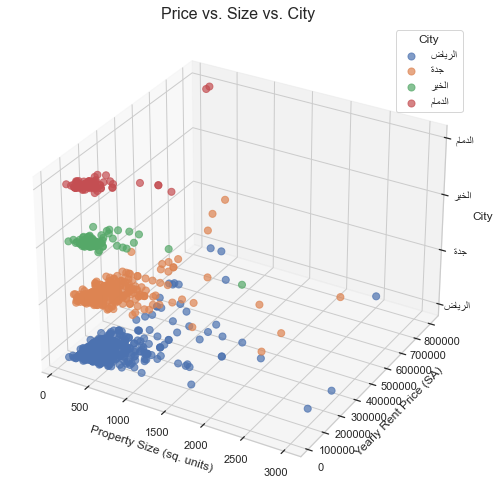

Correlation for ﺽﺎﻳﺮﻟﺍ:
                     size  YearlyRentPrice
size             1.000000         0.374296
YearlyRentPrice  0.374296         1.000000


Correlation for ﺓﺪﺟ:
                     size  YearlyRentPrice
size             1.000000         0.333695
YearlyRentPrice  0.333695         1.000000


Correlation for ﺮﺒﺨﻟﺍ:
                     size  YearlyRentPrice
size             1.000000         0.258027
YearlyRentPrice  0.258027         1.000000


Correlation for ﻡﺎﻣﺪﻟﺍ:
                     size  YearlyRentPrice
size             1.000000         0.134314
YearlyRentPrice  0.134314         1.000000




In [32]:
# Price vs. Size vs. City

from mpl_toolkits.mplot3d import Axes3D

# Map cities to numeric values
city_map = {city: idx for idx, city in enumerate(df_cleaned['city'].unique())}

# 3D Scatter Plot: Price vs. Size vs. City
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data
for city, idx in city_map.items():
    subset = df_cleaned[df_cleaned['city'] == city]
    ax.scatter(subset['size'], subset['YearlyRentPrice'], zs=idx, label=city, s=50, alpha=0.7)

# Customize axes
ax.set_title('Price vs. Size vs. City', fontsize=16)
ax.set_xlabel('Property Size (sq. units)', fontsize=12)
ax.set_ylabel('Yearly Rent Price (SA)', fontsize=12)
ax.set_zlabel('City', fontsize=12)

# Update z-ticks to display the city names instead of numeric values
ax.set_zticks(list(city_map.values()))
ax.set_zticklabels(list(city_map.keys()))

# Add a legend
ax.legend(title="City")

# Manually adjust the layout to avoid tight margins
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Show the plot
plt.show()

# Correlation between Property Size and Yearly Rent Price for each city
for city in df_cleaned['city'].unique():
    subset = df_cleaned[df_cleaned['city'] == city]
    correlation = subset[['size', 'YearlyRentPrice']].corr()
    print(f"Correlation for {city}:")
    print(correlation)
    print("\n")

**Findings for Price vs. Property Size Correlation:**

The correlation between property size and yearly rent price varies across the cities analyzed, indicating differing relationships between these two variables in different markets.

**Riyadh (ﺍﻟﺮﻳﺎﺽ):**

*   **Correlation Coefficient:** 0.374
    
*   **Interpretation:** There is a moderate positive correlation between property size and rent price. Larger properties in Riyadh tend to have higher rental prices, but other factors likely contribute to the price variations.
    

**Jeddah (ﺟﺪﺓ):**

*   **Correlation Coefficient:** 0.3337
    
*   **Interpretation:** A moderate positive correlation is observed in Jeddah. Larger properties are somewhat more likely to command higher rental prices, although other factors are also influential in determining prices.
    

**Khobar (ﺍﻟﺨﺒﺮ):**

*   **Correlation Coefficient:** 0.2580
    
*   **Interpretation:** A weak positive correlation exists between property size and rent price. While larger properties are somewhat associated with higher rents, other factors (e.g., location, amenities) might play a larger role in determining rent prices in Khobar.
    

**Dammam (ﺍﻟﺪﻣﺎﻡ):**

*   **Correlation Coefficient:** 0.1343
    
*   **Interpretation:** The weakest correlation is observed in Dammam. This suggests that property size has minimal influence on rental prices in this city, and other variables are likely more significant in determining rent.
    

**Summary of Findings:**

*   **Jeddah** shows a moderate positive correlation, indicating that property size is an important factor influencing rent prices, though other factors still contribute.
    
*   **Dammam** exhibits the weakest correlation, suggesting that other factors (such as location, building quality, and amenities) are more significant in driving rental prices.
    
*   **Riyadh** and **Khobar** fall in between, with moderate and weak positive correlations, respectively, suggesting that while property size influences rent, it is not the sole determinant.

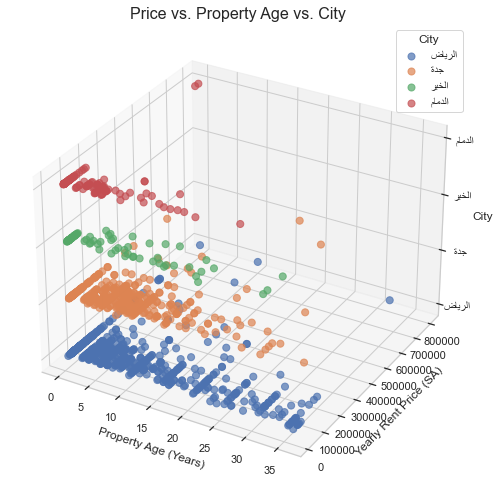

Correlation for ﺽﺎﻳﺮﻟﺍ:
                 property_age  YearlyRentPrice
property_age         1.000000         0.064807
YearlyRentPrice      0.064807         1.000000


Correlation for ﺓﺪﺟ:
                 property_age  YearlyRentPrice
property_age         1.000000         0.193664
YearlyRentPrice      0.193664         1.000000


Correlation for ﺮﺒﺨﻟﺍ:
                 property_age  YearlyRentPrice
property_age         1.000000         0.364519
YearlyRentPrice      0.364519         1.000000


Correlation for ﻡﺎﻣﺪﻟﺍ:
                 property_age  YearlyRentPrice
property_age         1.000000        -0.009016
YearlyRentPrice     -0.009016         1.000000




In [33]:
# Price vs. Property Age vs. City

# Map cities to numeric values
city_map = {city: idx for idx, city in enumerate(df_cleaned['city'].unique())}

# 3D Scatter Plot: Price vs. Property Age vs. City
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data
for city, idx in city_map.items():
    subset = df_cleaned[df_cleaned['city'] == city]
    ax.scatter(subset['property_age'], subset['YearlyRentPrice'], zs=idx, label=city, s=50, alpha=0.7)

# Customize axes
ax.set_title('Price vs. Property Age vs. City', fontsize=16)
ax.set_xlabel('Property Age (Years)', fontsize=12)
ax.set_ylabel('Yearly Rent Price (SA)', fontsize=12)
ax.set_zlabel('City', fontsize=12)

# Update z-ticks to display the city names instead of numeric values
ax.set_zticks(list(city_map.values()))
ax.set_zticklabels(list(city_map.keys()))

# Add a legend
ax.legend(title="City")

# Manually adjust the layout to avoid tight margins
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Show the plot
plt.show()

# Correlation between Property Age and Yearly Rent Price for each city
for city in df_cleaned['city'].unique():
    subset = df_cleaned[df_cleaned['city'] == city]
    correlation = subset[['property_age', 'YearlyRentPrice']].corr()
    print(f"Correlation for {city}:")
    print(correlation)
    print("\n")

**Findings for Price vs. Property Age Correlation:**

**Overall Context:**The relationship between property age and yearly rent price shows notable variation across cities. In some cities, property age has a weak positive correlation with rent, while in others, the relationship is negligible or even slightly negative.

**Riyadh (ﺍﻟﺮﻳﺎﺽ):**

*   **Correlation Coefficient:** 0.0648
    
*   **Interpretation:** There is a very weak positive correlation between property age and rent price in Riyadh. This suggests that property age has almost no influence on rental prices, with other factors such as location or property size likely playing a more significant role.
    

**Jeddah (ﺟﺪﺓ):**

*   **Correlation Coefficient:** 0.1937
    
*   **Interpretation:** Jeddah shows a weak positive correlation between property age and rent price. While older properties may slightly influence rent, other factors are more likely to be the primary determinants of rental prices in this city.
    

**Khobar (ﺍﻟﺨﺒﺮ):**

*   **Correlation Coefficient:** 0.3645
    
*   **Interpretation:** Khobar demonstrates a moderate positive correlation between property age and rent price. This suggests that older properties in Khobar may have characteristics (e.g., desirable locations, established infrastructure) that contribute to higher rents, though other factors also play a role.
    

**Dammam (ﺍﻟﺪﻣﺎﻡ):**

*   **Correlation Coefficient:** -0.0090
    
*   **Interpretation:** Dammam exhibits a very weak negative correlation, implying that property age has little to no impact on rental prices. This near-zero correlation suggests that factors other than age are more influential in determining rent.
    

**Summary of Findings:**

*   **Khobar** stands out with a moderate positive correlation, suggesting that older properties in this city might hold more value due to specific characteristics such as prime locations or established infrastructure.
    
*   **Jeddah** shows a weak positive correlation, indicating that property age has a slight influence on rental prices, but other factors are likely more significant.
    
*   **Riyadh** shows a negligible positive correlation, reinforcing the idea that property age is not a major factor influencing rental prices in this market.
    
*   **Dammam** has the weakest correlation, with a slight negative relationship, underscoring the fact that age is not an important factor for rental pricing in this city.
    

**Conclusion:**Across all cities, the correlations between property age and rent price are generally low, indicating that property age is not a dominant factor influencing rent prices in the analyzed data.

## Rent Price Vs. Property Features

### Heatmap and Quantitative Correlation Analysis

Quantitative Correlation Analysis:
bedrooms          -0.008349
livingrooms        0.217915
bathrooms          0.035464
maid_room          0.154970
driver_room        0.238013
garage             0.074256
kitchen            0.098090
ac                 0.267593
pool               0.266041
frontyard          0.079043
basement           0.219179
duplex            -0.089683
stairs             0.020774
elevator           0.168953
fireplace         -0.031100
furnished          0.131852
YearlyRentPrice    1.000000
Name: YearlyRentPrice, dtype: float64


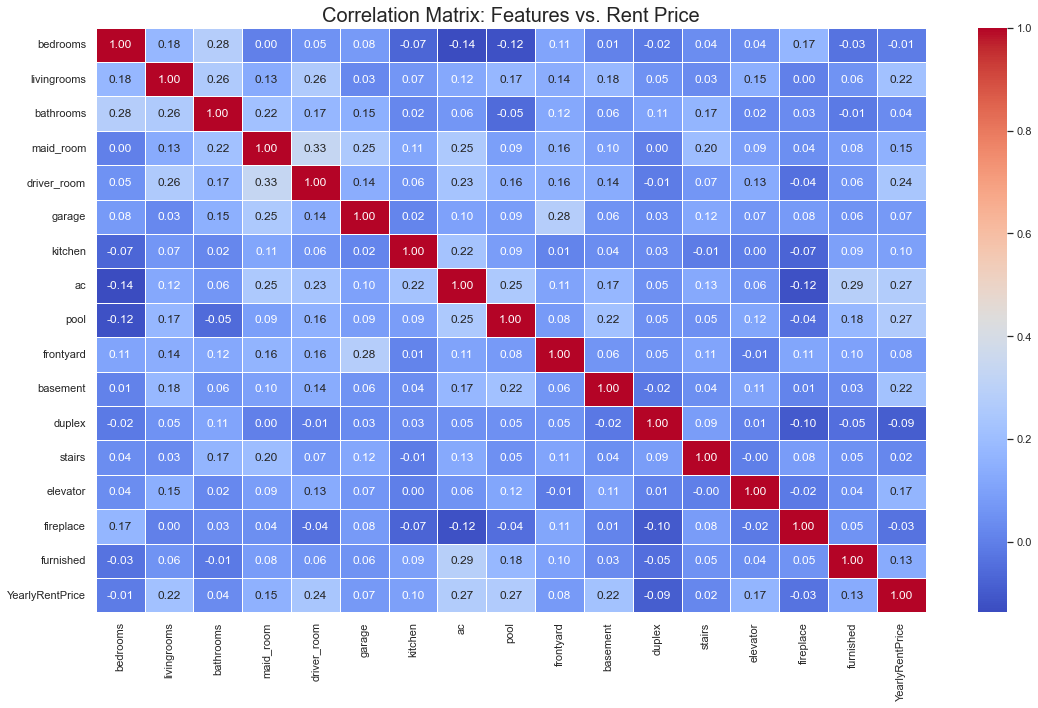

In [34]:
# Ensure all columns are numeric
df_features = df_cleaned.apply(pd.to_numeric, errors='coerce')

# Select relevant columns for analysis
features = [
    'bedrooms', 'livingrooms', 'bathrooms', 'maid_room', 'driver_room', 'garage',
    'kitchen', 'ac', 'pool', 'frontyard', 'basement', 'duplex', 'stairs', 
    'elevator', 'fireplace', 'furnished', 'YearlyRentPrice'
]

# Subset the data
subset = df_features[features]

# Correlation Analysis
correlation_matrix = subset.corr()

# Display Quantitative Correlation Results
print("Quantitative Correlation Analysis:")
print(correlation_matrix['YearlyRentPrice'])

# Visualize Correlations Using a Heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap='coolwarm', 
    fmt=".2f", 
    linewidths=0.5
)
plt.title('Correlation Matrix: Features vs. Rent Price', fontsize=20)
plt.tight_layout()
plt.show()

### Visualizations of Feature Impact

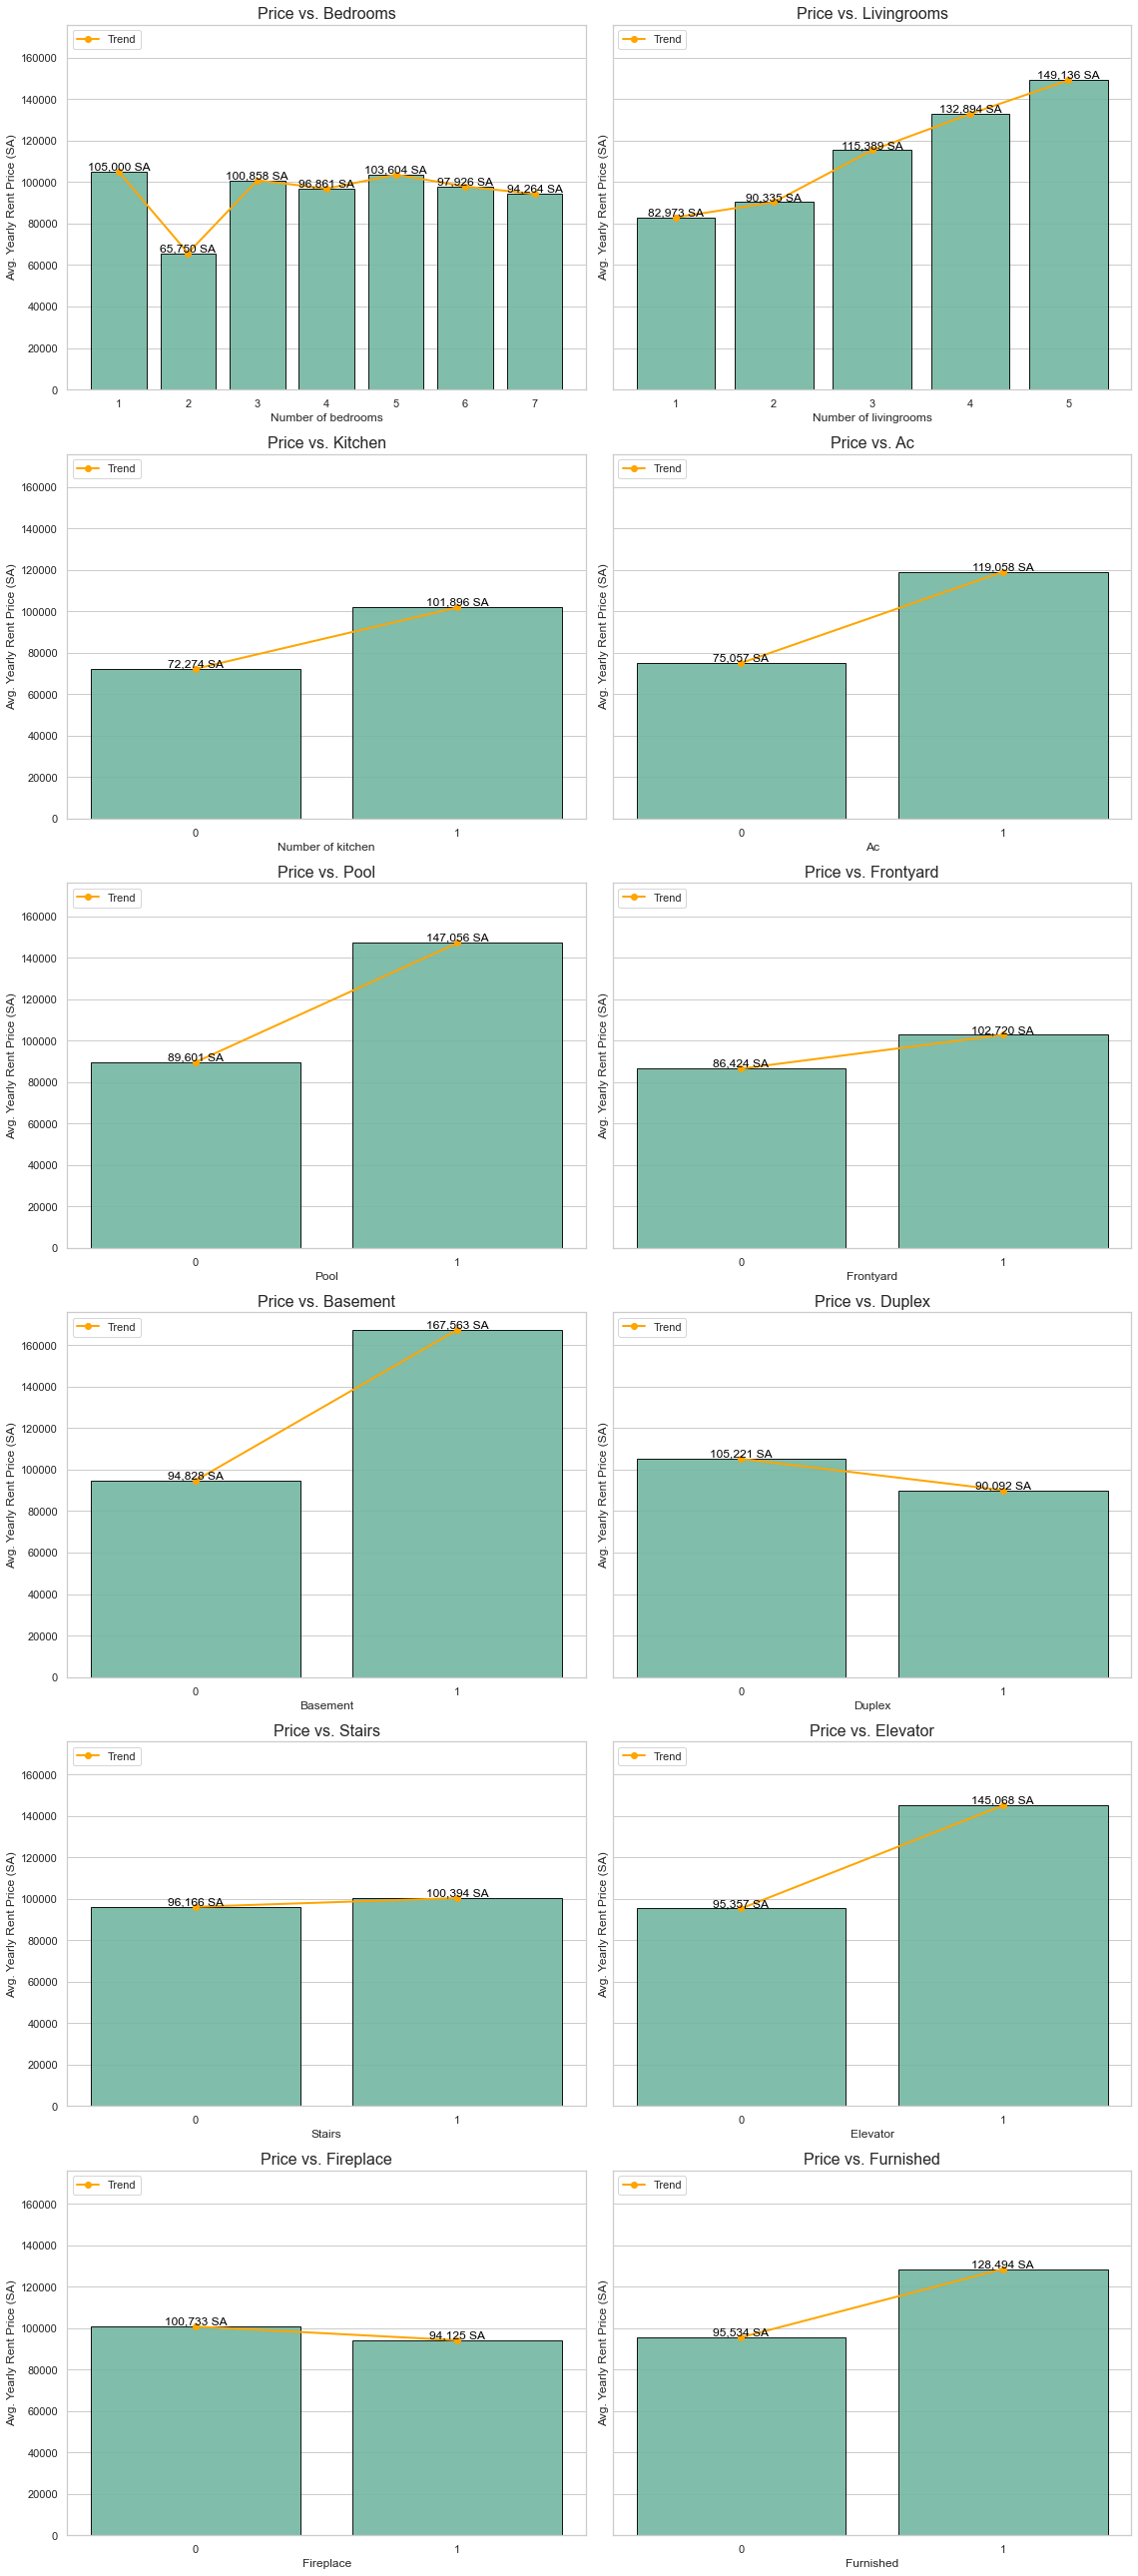

In [35]:
import numpy as np

# Set the style with a white grid and Set2 color palette
sns.set_theme(style="whitegrid", palette="Set2")

# List of features to analyze
features = [
    'bedrooms', 'livingrooms', 'kitchen', 'ac', 'pool', 'frontyard', 
    'basement', 'duplex', 'stairs', 'elevator', 'fireplace', 'furnished'
]

# Create subplots: 2 graphs per row
n_cols = 2  # Number of columns per row
n_rows = (len(features) + n_cols - 1) // n_cols  # Calculate rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 6), sharey=True)
axes = axes.flatten()  # Flatten to handle indexing easily

# Loop through features and plot
for i, feature in enumerate(features):
    avg_price = df_features.groupby(feature)['YearlyRentPrice'].mean()
    
    # Plot on the current axis
    ax = axes[i]
    
    # Create the bar plot
    sns.barplot(
        x=avg_price.index, 
        y=avg_price.values, 
        ax=ax, 
        color=sns.color_palette("Set2")[0], 
        alpha=0.9, 
        edgecolor='black'
    )
    
    # Generate x-axis positions for the line plot
    x_positions = np.arange(len(avg_price.index))
    
    # Overlay line plot directly on the same axis
    ax.plot(
        x_positions, 
        avg_price.values, 
        color='orange', 
        marker='o', 
        linestyle='-', 
        linewidth=2, 
        label='Trend'  # Label for the line plot
    )

    # Annotate bar plot
    for j, value in enumerate(avg_price.values):
        ax.text(j, value, f"{value:,.0f} SA", color='black', ha='center', va='bottom', fontsize=12)
    
    # Set titles and labels
    ax.set_title(f"Price vs. {feature.capitalize()}", fontsize=16)
    ax.set_xlabel(f"Number of {feature.lower()}" if feature in ['bedrooms', 'livingrooms', 'kitchen'] else feature.capitalize(), fontsize=12)
    ax.set_ylabel("Avg. Yearly Rent Price (SA)", fontsize=12)
    
    # Show the legend for the line plot
    ax.legend(loc="upper left")

# Hide unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

**Findings on Features Affecting Rent Price in the Saudi Arabian Market**

**Highly Influential Features:**

*   **Air Conditioning (AC) (0.268):** AC systems are essential for comfort in Saudi Arabia’s hot climate, significantly driving rental value. This makes AC a non-negotiable feature for most tenants.
    
*   **Pools (0.266):** A swimming pool is seen as a luxury feature, appealing to tenants seeking high-end living accommodations, especially in upscale neighborhoods.
    
*   **Driver Rooms (0.238):** Driver rooms cater to cultural and practical needs in Saudi Arabia, particularly for larger households or families employing private drivers.
    
*   **Basements (0.219):** Basements are highly desirable, especially in family-oriented housing, as they provide additional usable space for storage, recreation, or extra rooms.
    

**Moderately Influential Features:**

*   **Living Rooms (0.218):** Spacious living rooms are valued for hosting family gatherings or entertaining guests, reflecting the importance of communal areas in Saudi culture.
    
*   **Elevators (0.169):** Elevators are a key convenience feature in high-rise apartments, commonly found in urban centers like Riyadh and Jeddah, where multi-story living is prevalent.
    
*   **Maid Rooms (0.155):** Maid rooms are a practical addition for families employing live-in domestic help, contributing to higher rental value in family-friendly properties.
    
*   **Furnished Properties (0.132):** Furnished rentals attract expatriates, professionals, and short-term tenants, especially in metropolitan areas like Riyadh and Jeddah.
    
*   **Kitchens (0.098):** Modern and well-equipped kitchens add moderate value, as they enhance the functionality and appeal of the property.
    
*   **Front Yard (0.079):** A front yard adds aesthetic and functional appeal, especially in standalone villas or family homes.
    
*   **Garage (0.074):** Properties with garages offer security and convenience for vehicle owners, making them moderately influential in determining rent.
    

**Minimal or Negligible Influence:**

*   **Bathrooms (0.035):** While important for functionality, bathrooms have a relatively minor influence on rental price compared to other amenities.
    
*   **Stairs (0.021):** Stairs have little impact on rental prices, as they are often considered a neutral feature unless they are part of a unique architectural style.
    

**Negative Correlations:**

*   **Duplexes (-0.090):** Duplexes are less desirable compared to standalone villas or apartments, which better align with tenant preferences in Saudi Arabia.
    
*   **Fireplaces (-0.031):** Fireplaces are rarely used in Saudi Arabia's hot climate, making them unnecessary and slightly detracting from rental value.
    

**Summary:**

In the Saudi Arabian rental market, particularly in cities like Riyadh, Jeddah, Khobar, and Dammam, features like **Air Conditioning (AC)**, **pools**, **driver rooms**, and **basements** significantly increase rental prices. These features cater to both comfort and luxury, driving demand for high-end living spaces.

Moderately impactful features include **living rooms**, **elevators**, **maid rooms**, **furnished options**, **kitchens**, **front yards**, and **garages**, which reflect the urban and family-oriented lifestyles prevalent in the region.

On the other hand, features such as **bathrooms**, **stairs**, **duplex configurations**, and **fireplaces** have minimal or negative influence on rental prices. **Bathrooms**, while necessary, have a smaller impact than expected, likely due to their standard inclusion in all properties.

Overall, features that emphasize comfort, practicality, and luxury are the key drivers of rental value in the Saudi market.

## Preparing Data for Modeling and Visualization in Power BI

In [36]:
# Drop unnecessary columns: 'status', 'details', and 'price'
df_prepared = df_cleaned.drop(columns=['Status', 'details', 'price'])

In [37]:
# Create KPIs for Power BI:
# 1. Rent per square meter
df_prepared['Rent_Per_Square_Meter'] = df_prepared['YearlyRentPrice'] / df_prepared['size']

In [38]:
# 2. Total rooms (bedrooms + living rooms)
df_prepared['Total_Rooms'] = df_prepared['bedrooms'] + df_prepared['livingrooms']

In [39]:
# 3. Feature Count: Sum of all binary features for each property
binary_features = [
    'garage', 'driver_room', 'maid_room', 'furnished', 'ac',
    'roof', 'pool', 'frontyard', 'basement', 'duplex', 'stairs', 'elevator', 'fireplace'
]
df_prepared['Feature_Count'] = df_prepared[binary_features].sum(axis=1)

In [46]:
# Apply Arabic reshaping and bidi display correction
# df_prepared['city'] = df_prepared['city'].apply(lambda x: get_display(arabic_reshaper.reshape(x)))
df_prepared['district'] = df_prepared['district'].apply(lambda x: get_display(arabic_reshaper.reshape(x)))
df_prepared['front'] = df_prepared['front'].apply(lambda x: get_display(arabic_reshaper.reshape(x)))

In [48]:
# Save the DataFrame as an Excel file
output_file = "df_for_power_bi.xlsx"

with pd.ExcelWriter(output_file, engine='xlsxwriter') as writer:
    df_prepared.to_excel(writer, sheet_name="Data", index=False, encoding="utf-8-sig")

In [49]:
display(df_prepared.head())

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,stairs,elevator,fireplace,YearlyRentPrice,BinnedRentPrice,size_range,PropertyAgeRange,Rent_Per_Square_Meter,Total_Rooms,Feature_Count
0,ﺽﺎﻳﺮﻟﺍ,ﺣﻲ ﺍﻟﺮﻭﺿﺔ,ﺏﺮﻏ,3000,19,3,5,5,1,1,...,0,0,0,250000,200K-500K,2800-3000,16-20 years,83.333333,8,8
1,ﺽﺎﻳﺮﻟﺍ,ﺣﻲ ﺍﻟﺴﻠﻴﻤﺎﻧﻴﺔ,ﻝﺎﻤﺷ,2944,0,5,4,3,1,0,...,0,0,0,130000,100K-200K,2800-3000,0-5 years,44.157609,8,5
2,ﺓﺪﺟ,ﺣﻲ ﺍﻟﺨﺎﻟﺪﻳﺔ,ﻉﺭﺍﻮﺷ 3,2700,10,7,5,5,1,1,...,1,1,0,450000,200K-500K,2600-2800,11-15 years,166.666667,12,9
3,ﺓﺪﺟ,ﺣﻲ ﺍﻟﺮﻭﺿﺔ,ﻝﺎﻤﺷ,2500,0,5,5,5,1,1,...,1,1,0,181818,100K-200K,2400-2600,0-5 years,72.727200,10,10
4,ﺓﺪﺟ,ﺣﻲ ﺍﻟﺮﻭﻳﺲ,ﻉﺭﺍﻮﺷ 3,2500,15,7,3,1,1,1,...,1,0,1,65000,50K-100K,2400-2600,16-20 years,26.000000,8,6
